In [1]:
import numpy as np
from xrdc import xrdutils as xdu
from xrdc import simulation as sim

from xrdc import simulation
from xrdc import datasets as xd
import matplotlib.pyplot as plt

from xrdc import featurization as feat
from xrdc import source_separation as sep
from xrdc import peak_fitting as pf
from xrdc.datasets import d2d

def sample_peak_intensity():
    return np.random.uniform()

# https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array
import pandas as pd
from scipy.signal import argrelextrema

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


def get_ridges(orig, axis = 1):
    # determine the indices of the local maxima
    max_ind = argrelextrema(orig, np.greater, axis = axis)
#     max_ind_2 = argrelextrema(orig, np.greater, axis = 0)
#     max_ind = np.hstack((max_ind[0], max_ind_2[0])), np.hstack((max_ind[1], max_ind_2[1]))
    
    edges = np.zeros_like(orig)
    edges[max_ind] = 1
    return edges

def shuffle(bin_img, size = 1):
    ret = np.zeros_like(bin_img)
    for s in range(-size, size + 1):
        ret += np.roll(bin_img, s, axis = 0)
        ret += np.roll(bin_img, s, axis = 1)
    return np.sign(ret)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


In [2]:
from importlib import reload
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [3]:
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [5]:
patterns = d2d.patterns
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7)
background = slow_q

(0, 0)


In [8]:
# labeled, feature_masks, activations, activations_n0, activations_n1 = feat.get_ridge_features(patterns,
#    smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True, size_thresh = 2, bgsub=False,
#     log_scale_features = False, fwhm_finder=fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
#     flood_threshold=.95)

# labeled, feature_masks, activations, activations_n0, activations_n1 = feat.get_ridge_features(patterns,
#    smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True,
#     size_thresh = 30,
#     bgsub=False, log_scale_features = False, fwhm_finder=lambda x: 5, do_flood_thicken = False, max_size_flood = 20,
#     flood_threshold=.95, a = 2, b = 3);

In [6]:
from scipy.ndimage.filters import gaussian_filter as gf

Peak at 69, start iteration with error = 0.5545020976281996
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231

Peak at 207, iteration 0: error = 320.66815944623033
bounds ([-29.8, -6336.690450537386, 0, 0, 0], [625.8, inf, inf, 149.0, 149.0])
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 

/home/ollie/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


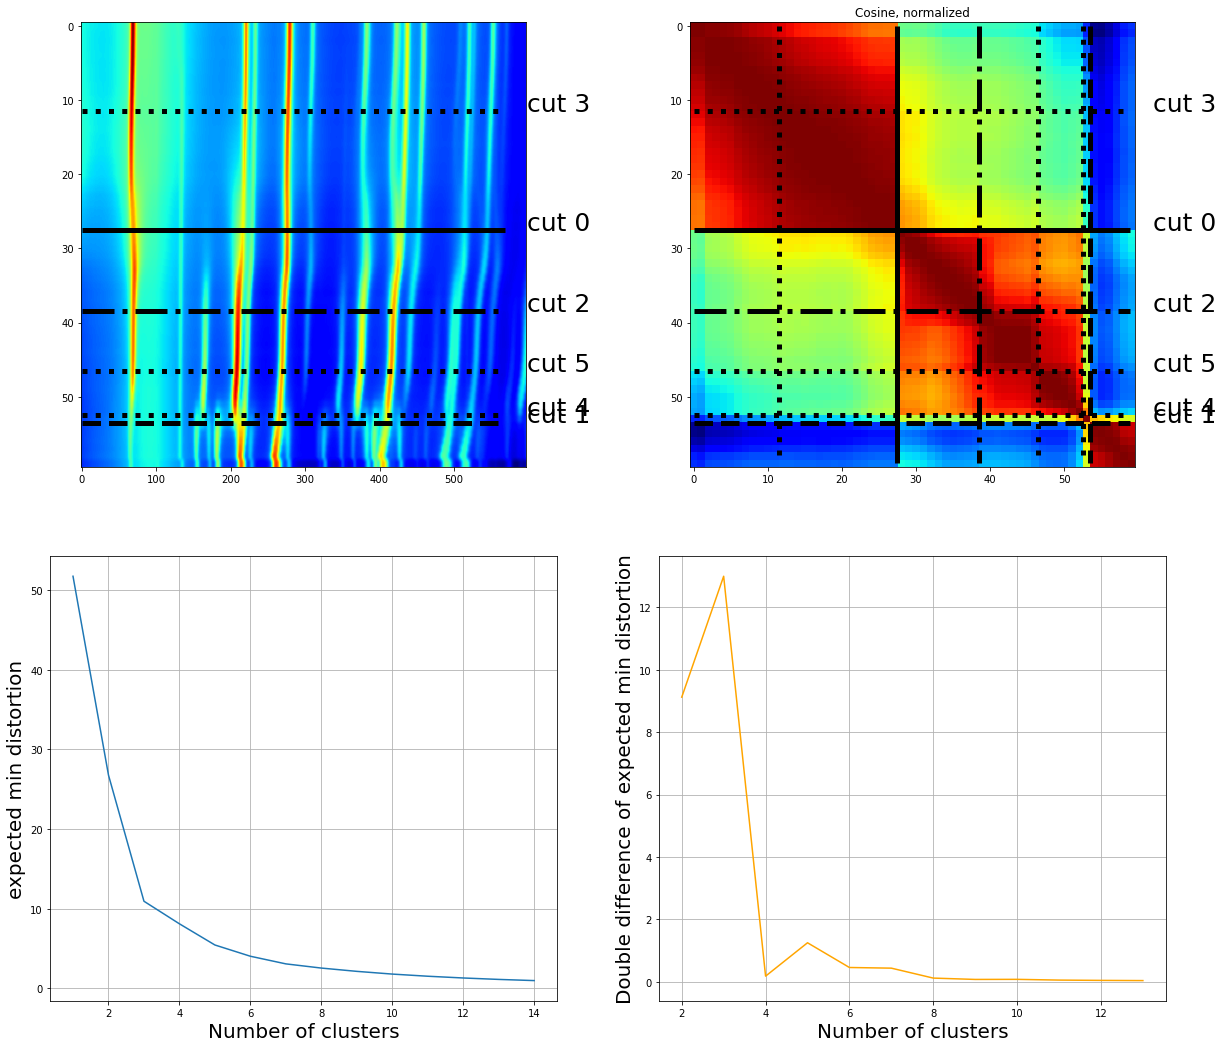

In [7]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 1, threshold_percentile = 75, thicken = True, size_thresh = 5, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 0, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1

patterns_pp_simple = fast_q * (fast_q > 0)
labeled_simple, feature_masks_simple, activations_simple, _norm, activations_n1_simple =\
    default_featurize(patterns_pp_simple);
# straightened_heatmap_simple = feat.get_peakshift_corrected_heatmap(patterns_pp_simple, activations_simple, labeled_simple)

def get_activations(patterns_pp_simple):
    activations_n1_simple = feat.norm((feature_masks_simple * patterns_pp_simple).sum(axis = 2), axis = 1)
    return activations_n1_simple

act = get_activations(fast_q * (fast_q > 0))

simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, act, act, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

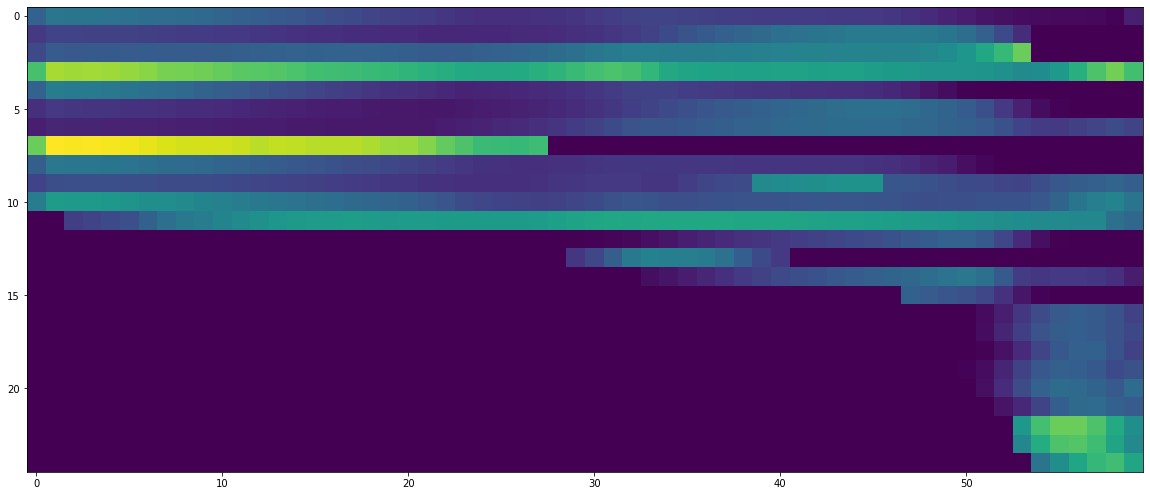

In [9]:
plt.imshow(act)

In [10]:
# fsub_stop_2d = pf.curvefit_2d((patterns - 0), stdratio_threshold = 2, noise_estimate = fast_T,
#                    background = background, bg_shift_pos = False)



In [38]:
N = 1000
np.random.normal(size = N * np.prod((patterns.shape))).reshape((N,) + patterns.shape) * fast_T;

In [13]:
np.random.normal(size = N * np.prod((patterns.shape))).reshape((N,) + patterns.shape).mean()

0.0009762796013690494

In [14]:
def sample(signal_estimate, noise_estimate, N = 100):
    """
    Given data matrix and matrix of estimates of the noise standard deviation,
    ............ todo"""
    gaussian_noise = np.random.normal(size = N * np.prod((signal_estimate.shape))).reshape((N,)\
                                                                        + signal_estimate.shape)
    noise_samples = noise_estimate * gaussian_noise
    #return noise_samples
    return signal_estimate + noise_samples

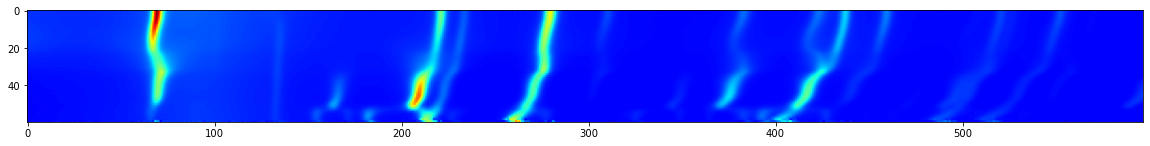

In [15]:
plt.imshow(sample(patterns, fast_T)[1], cmap = 'jet')

In [39]:
# TODO fast_q or slow_T - background?
data_samples = sample(fast_q * (fast_q > 0), fast_T, N = N)

In [40]:
%%capture 
X_samples = np.array([get_activations(sample).T for sample in data_samples]);

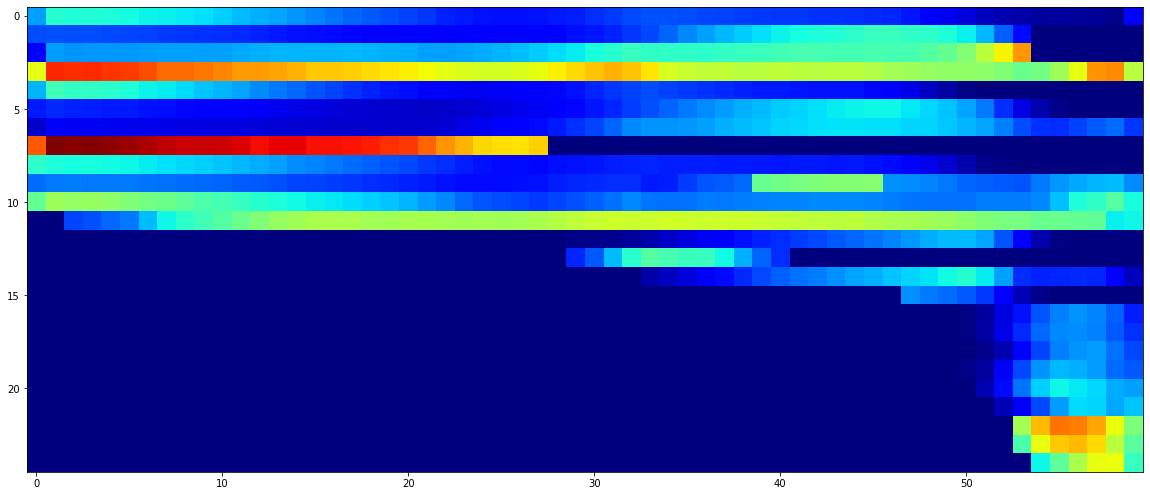

In [18]:
plt.imshow(X_samples[0].T, cmap = 'jet')

<ipython-input-78-cc98622538dd>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(1 + fast_q), cmap = 'jet')


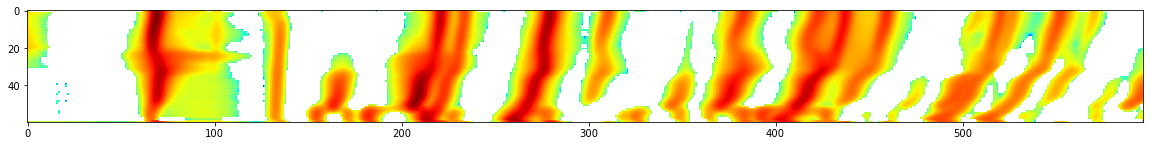

In [78]:
plt.imshow(np.log(1 + fast_q), cmap = 'jet')

<ipython-input-77-c8fb956aa827>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(1 + samples[0]), cmap = 'jet')


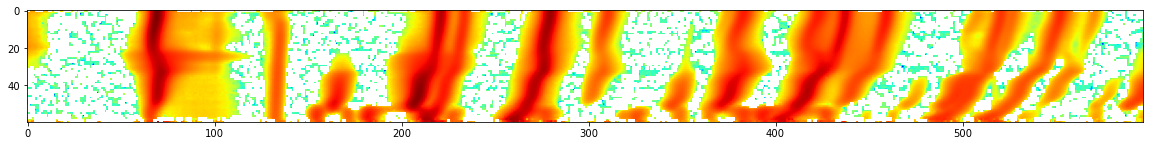

In [77]:
plt.imshow(np.log(1 + samples[0]), cmap = 'jet')

In [7]:
# patterns_pp = fast_q - fast_q.min()
# patterns_pp /= patterns_pp.mean()
# fitlists = fsub_stop_2d[1]

# labeled, feature_masks, activations, norm_, activations_n1 = feat.peakfit_featurize(patterns_pp, fitlists,
#                                                                     size_thresh = 5, peakwidth = 1.5)

In [19]:
from xrdc import misc

{'linkage': 'ward', 'affinity': 'euclidean'}


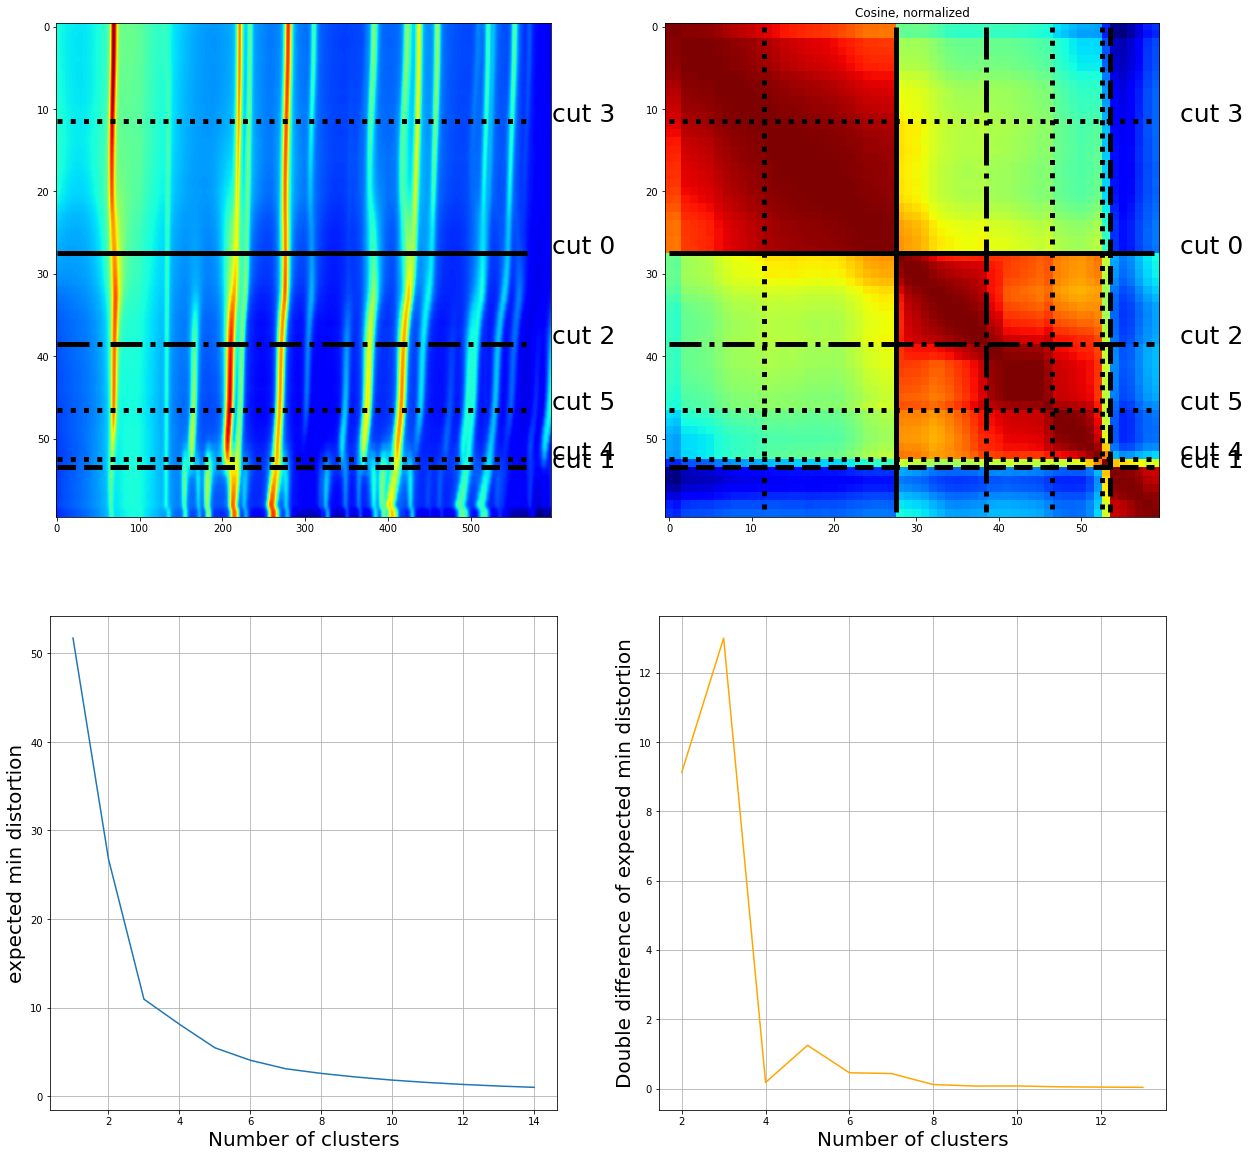

In [87]:
simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, activations_n1_simple, activations_n1_simple, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

25.16454159500381
{'linkage': 'ward', 'affinity': 'euclidean'}


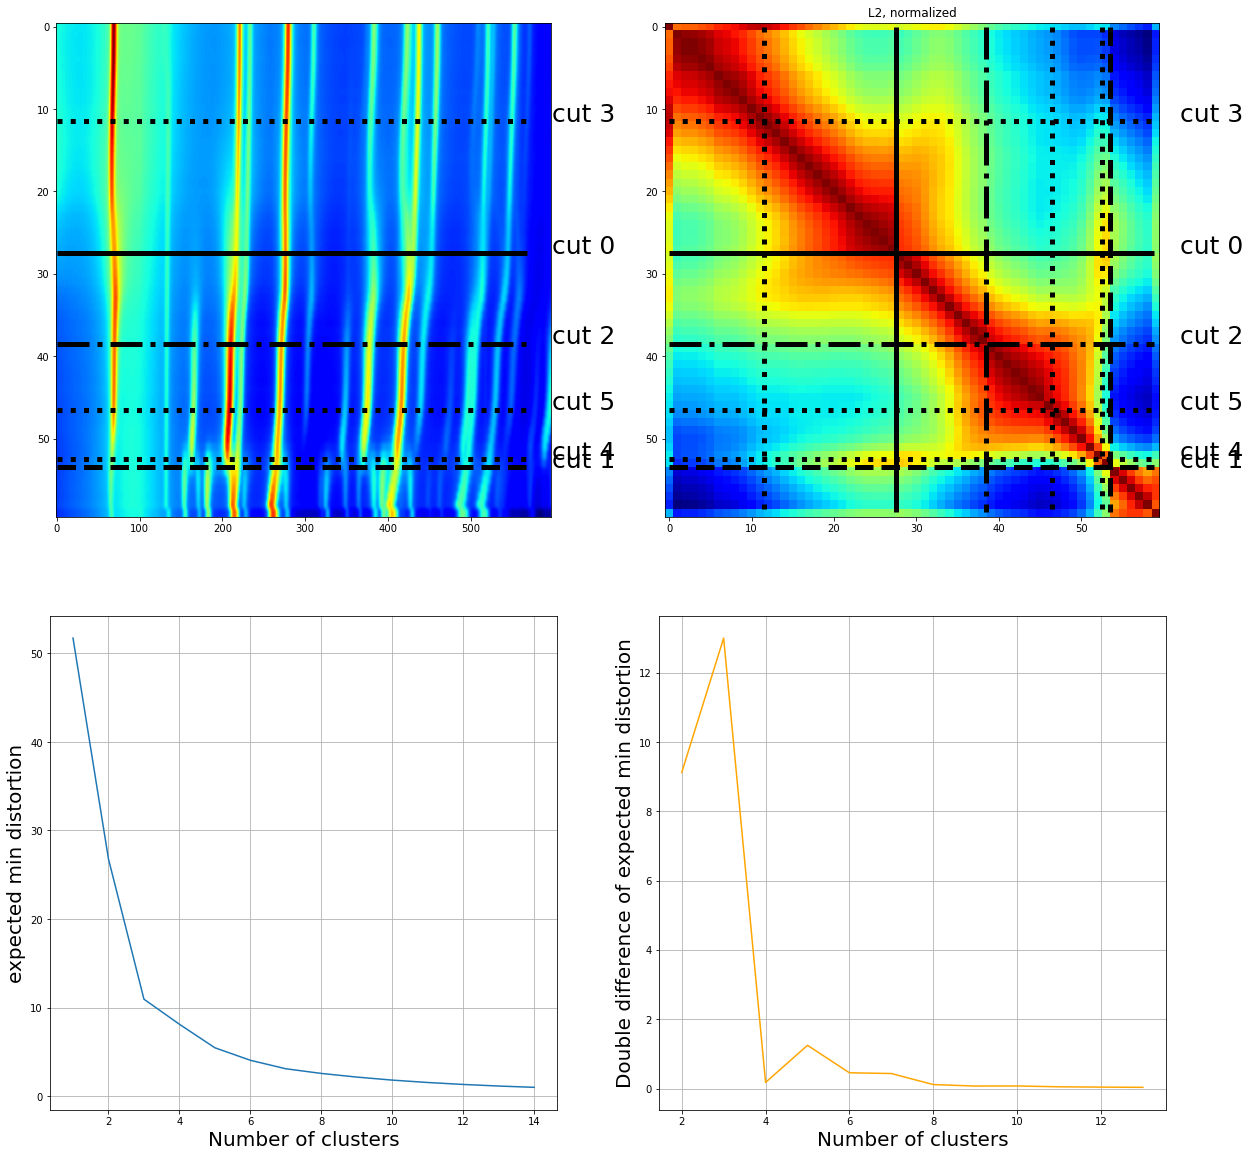

In [118]:
simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, get_activations(fast_q * (fast_q > 0)),np.mean(X_samples, axis = 0).T, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

In [20]:
act = activations_n1_simple

X = act.T

In [21]:
def l2_pairs(a):
    """
    Calculate L2 distances.
    """
    #b = b.reshape((b.shape[0], 1, a.shape[1]))
    b = a.reshape((a.shape[0], 1, a.shape[1]))
    dist_l2 = np.sqrt(np.einsum("ijk, ijk->ij", a - b, a - b))
    return dist_l2

In [22]:
import pandas as pd

In [48]:
def boot_step(outputs, c_probs):
    # update probabilities
    idx_draws = [(o[-1],) for o in outputs]
    #idx_draws = [o[-1] for o in outputs]

    draw_counts = pd.DataFrame(idx_draws).value_counts().sort_values()

    imerge, jmerge = draw_counts.sort_values().index[-1][0]

    draw_probs = draw_counts / draw_counts.sum()

    #new_prob = draw_probs[(imerge, jmerge)].iloc[0] * np.prod(c_probs[[imerge, jmerge]])

    # use this output for the next agglo clustering iteration 
    for i, (_, _, _, _, idx_pair) in enumerate(outputs):
        if idx_pair == (imerge, jmerge):
            imatch = i
            break
    #distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp = outputs[imatch]
    
    idx_other = np.array(list(set(list(range(len(c_probs)))) - set([imerge, jmerge])))
#     # TODO
#     # pd.DataFrame(draw_probs.iloc[:-1], columns = ['prob']).reset_index()
#     other_probs = c_probs[idx_other]
#     c_probs_tmp = np.hstack((new_prob, other_probs))

    outputs_tmp = [agglom_step(*output) for output in outputs]
    return outputs_tmp, c_probs#c_probs_tmp

def get_new_distance(new_size, imerge, jmerge, k, c_sizes, distances):
    N = (new_size + c_sizes[k])
    ai = ((c_sizes[imerge] + c_sizes[k]) / N)
    aj = ((c_sizes[jmerge] + c_sizes[k]) / N)
    b = ((c_sizes[k]) / N)
    return ai * distances[imerge, k] + aj * distances[jmerge, k] - b * distances[imerge, jmerge]

def agglom_step(distances, ids, clusters, c_sizes, *args):
    imerge, jmerge = np.unravel_index(np.argmin(distances, axis=None), distances.shape)

    newcluster = np.vstack((clusters[imerge], clusters[jmerge]))
    
    newcluster_ids = np.concatenate(ids[[imerge, jmerge]])[None, :]

    idx_other = np.array(list(set(list(range(len(clusters)))) - set([imerge, jmerge])))

    otherclusters = [clusters[idx] for idx in idx_other]

    otherclusters_ids = ids[idx_other]

    new_size = c_sizes[[imerge, jmerge]].sum()
    others_sizes = c_sizes[idx_other]

    # calculate new pairwise distance matrix
    #new_distances_ij = np.array([get_new_distance(new_size, imerge, jmerge, , c_sizes) for k in idx_other])
    new_distances_ij = get_new_distance(new_size, imerge, jmerge, idx_other, c_sizes, distances)
    distances_tmp = distances[np.ix_(idx_other.ravel(), idx_other.ravel())]
    distances_tmp = np.hstack((
          np.vstack(([np.inf], new_distances_ij[:, None])),
          np.vstack((new_distances_ij, distances_tmp))))

    clusters_tmp = np.array([newcluster] + otherclusters, dtype = object)

    ids_tmp = np.array(list(newcluster_ids) + list(otherclusters_ids), dtype = object)

    c_sizes_tmp = np.hstack((new_size, c_sizes[idx_other]))
    
    
    return distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp, (imerge, jmerge)

# initialization
def get_init(X):
    ids = np.arange(len(X))[:, None]

    clusters = np.empty(shape = len(X), dtype = object)
    clusters.fill(X[:, None])
    #clusters = list(X[:, None])
    distances = feat.l2_pairs(X)
    c_sizes = np.ones(len(clusters))#np.array(misc.deepmap(clusters, lambda clust: len(clust), level = 1))
    np.fill_diagonal(distances, np.inf)
    return distances, ids, clusters, c_sizes


# initialization
#distances, ids, clusters, c_sizes
outputs = [agglom_step(*get_init(X)) for X in X_samples]
_, _, _, sizes_tmp, _ = outputs[0]
c_probs = np.ones_like(sizes_tmp)

In [655]:
outputs[10][1]

array([array([49, 50, 51, 47, 48, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 37, 38,
              35, 36, 33, 34, 32, 29, 30, 31, 28, 54, 55, 56, 57, 58, 59])       ,
       array([17, 18, 19, 20, 21, 22, 15, 16, 14, 12, 13, 24, 25, 26, 27, 23,  4,
               5,  2,  3,  1,  0, 10, 11,  8,  9,  6,  7])                       ],
      dtype=object)

In [49]:
def get_final_clusters(outputs):
    final_clusters = np.vstack([o[1] for o in outputs])
    # sort clusters by mean index
    final_clusters = np.array([rows[np.argsort([r.mean() for r in rows])] for rows in final_clusters])
    return final_clusters

In [50]:
nclust = len(patterns)

final_clust_dict = dict()

for _ in range(len(patterns) - 3):
    outputs, c_probs = boot_step(outputs, c_probs);
    nclust -= 1
    final_clust_dict[nclust] = get_final_clusters(outputs)

In [658]:
from sklearn.cluster import AgglomerativeClustering


In [662]:
nclusters = 4

In [667]:
clustering = AgglomerativeClustering(n_clusters=4).fit_predict(X_samples[0])

177 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [664]:
cluster_indices = []
for i in range(nclusters):
    cluster_indices.append(np.arange(len(patterns))[clustering == i])

In [665]:
cluster_indices

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]),
 array([54, 55, 56, 57, 58, 59]),
 array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])]

In [661]:
feat.label?

In [657]:
final_clust_dict[5]

array([[array([ 4,  5,  2,  3,  1,  0, 10, 11,  8,  9,  6,  7]),
        array([17, 18, 19, 20, 21, 22, 15, 16, 14, 12, 13, 26, 27, 24, 25, 23]),
        array([50, 51, 48, 49, 47, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 29, 30,
               28, 31, 32, 33, 34, 35, 36, 37, 38])                               ,
        array([56, 57, 55, 54, 58, 59])],
       [array([15, 16, 14, 17, 18, 19, 20, 21, 10, 11,  8,  9, 12, 13, 26, 27, 24,
               25, 22, 23,  0,  1,  4,  5,  2,  3,  6,  7])                       ,
        array([35, 36, 34, 32, 33, 37, 38, 29, 30, 31, 28]),
        array([49, 50, 51, 47, 48, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40]),
        array([54, 55, 56, 57, 58, 59])],
       [array([ 4,  5,  2,  3,  1,  0, 10, 11,  8,  9,  6,  7]),
        array([17, 18, 19, 20, 21, 22, 15, 16, 14, 12, 13, 24, 25, 26, 27, 23]),
        array([49, 50, 51, 47, 48, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 29, 30,
               28, 31, 32, 33, 34, 35, 36, 37, 38])                  

In [51]:
N

1000

In [52]:
final_clust_dict[3]

array([[array([17, 18, 19, 20, 21, 22, 15, 16, 14, 12, 13, 26, 27, 24, 25, 23,  4,
                5,  2,  3,  1,  0, 10, 11,  8,  9,  6,  7])                       ,
        array([50, 51, 48, 49, 47, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 29, 30,
               28, 31, 32, 33, 34, 35, 36, 37, 38, 56, 57, 55, 54, 58, 59])       ],
       [array([15, 16, 14, 17, 18, 19, 20, 21, 10, 11,  8,  9, 12, 13, 26, 27, 24,
               25, 22, 23,  0,  1,  4,  5,  2,  3,  6,  7])                       ,
        array([49, 50, 51, 47, 48, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 35, 36,
               34, 32, 33, 37, 38, 29, 30, 31, 28, 54, 55, 56, 57, 58, 59])       ],
       [array([17, 18, 19, 20, 21, 22, 15, 16, 14, 12, 13, 24, 25, 26, 27, 23,  4,
                5,  2,  3,  1,  0, 10, 11,  8,  9,  6,  7])                       ,
        array([49, 50, 51, 47, 48, 52, 53, 43, 44, 45, 41, 42, 46, 39, 40, 29, 30,
               28, 31, 32, 33, 34, 35, 36, 37, 38, 57, 58, 59, 55, 56, 54])     

In [770]:
def print_cluster_stats(i):
    sets_i = list(map(set, final_clusters[:, i]))
    setsims = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            setsims[i, j] += int(sets_i[i] == sets_i[j])

    ss = setsims.sum(axis = 0)

    highest_prob = np.argsort(ss)[-1]

    print('cluster:', sets_i[highest_prob])
    print('with probability:', ss.max(), 'percent')
    
def boundary_freq(i, final_clusters):
    sets_i = np.array(list(map(lambda x: np.array((np.max(x), np.min(x))), final_clusters[:, i])))
    return sets_i[:, 0], sets_i[:, 1]

In [54]:
# bound_values = boundary_freq(0)[0]

(array([139.,   0.,   5.,   0.,  36., 202.,   0.,   1., 379., 238.]),
 array([ 8. ,  8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. ]),
 <BarContainer object of 10 artists>)

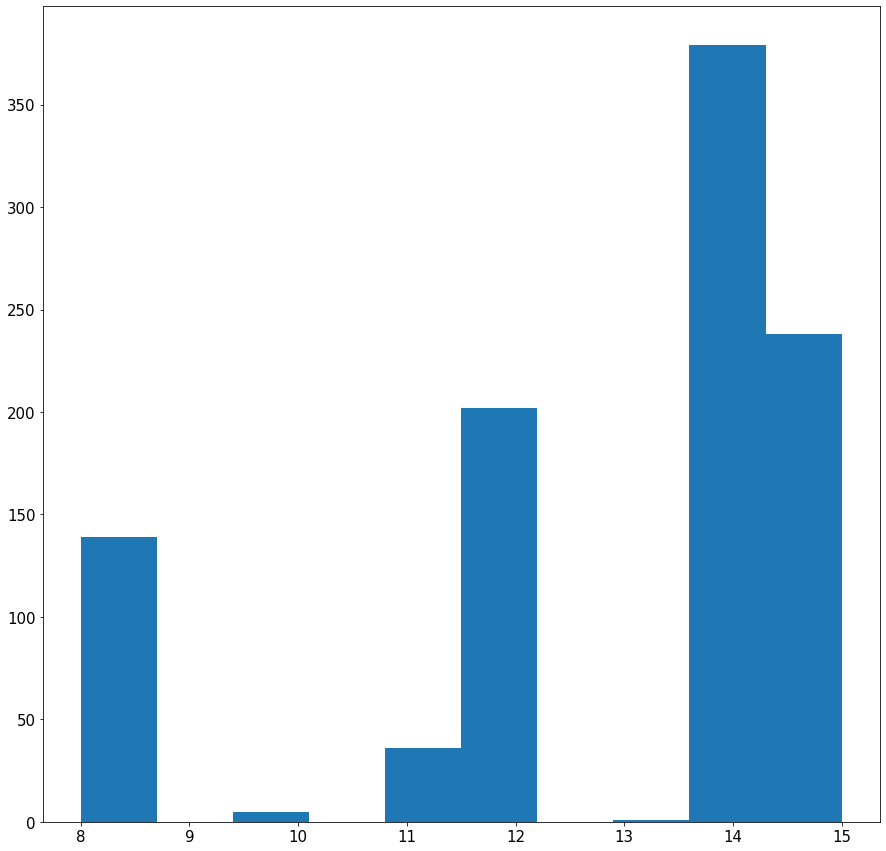

In [873]:
plt.hist(boundary_freq(1, final_clusters)[1])

In [876]:
i = 0
threshold = 0
bound_values = boundary_freq(i, final_clusters)[0]
bound_counts = pd.DataFrame([bound_values]).T.value_counts().astype(int)
bound_freqs = bound_counts / bound_counts.sum()
bound_freqs = bound_freqs.sort_values(ascending = False)

bound_freqs = bound_freqs[bound_freqs > threshold]
bf_df = pd.DataFrame(bound_freqs, columns = ['freq']).reset_index()

In [877]:
bound_counts

13    379
14    238
11    202
7     139
10     36
9       5
12      1
dtype: int64

In [860]:
def get_cut_groups(i, final_clusters, threshold = 0., tol = 1):
    """
    Get cluster boundary indices and probabilities, with the specified
    tolerance for grouping together nearby boundaries.
    """
    bound_values = boundary_freq(i, final_clusters)[0]
    bound_counts = pd.DataFrame([bound_values]).T.value_counts().astype(int)
    bound_freqs = bound_counts / bound_counts.sum()
    bound_freqs = bound_freqs.sort_values(ascending = False)

    bound_freqs = bound_freqs[bound_freqs > threshold]
    bf_df = pd.DataFrame(bound_freqs, columns = ['freq']).reset_index()

    heads = dict()
    group_indices = dict()

    head = bf_df[0][0]
    head_prob = bf_df['freq'].iloc[0]
    heads[head] = head_prob
    current_indices = (bound_values == head)

    for row, nextrow in zip(list(bf_df.iterrows()), list(bf_df.iterrows())[1:]):
        i = int(row[1][0])
        j = int(nextrow[1][0])
        if np.abs(i - j) <= tol:
            head_prob += round(nextrow[1]['freq'], 2)
            current_indices = (current_indices | (bound_values == j))
        else:
            heads[head] = head_prob
            group_indices[head] = current_indices

            current_indices = (bound_values == j)
            head_prob = nextrow[1]['freq']
            head = j

    heads[head] = head_prob
    group_indices[head] = current_indices
    return heads, group_indices

In [706]:
def iter_combos(lsts, getter):
    if len(lsts) == 0:
        yield []
    else:
        for k, v in lsts[0].items():
            for rest in iter_combos(lsts[1:], getter):
                yield [getter(k, v)] + rest

In [889]:
np.argsort(np.arange(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [898]:
def compile_ensemble(nclust):
    final_clusters = final_clust_dict[nclust + 1]

    cuts = [get_cut_groups(i, final_clusters) for i in range(nclust)]
    cuts_idxs = list(zip(*cuts))[0]
    cuts_masks = list(zip(*cuts))[1]

    itmasks = list(iter_combos(cuts_masks, lambda k, v: v))
    configuration_masks = np.array([reduce(lambda a, b: a & b, itmask) for itmask in itmasks])
    configuration_counts = np.array([reduce(lambda a, b: a & b, itmask).sum() for itmask in itmasks])
    configuration_freqs = configuration_counts / configuration_counts.sum()
    
    
    mask_most_probable_configuration = configuration_masks[np.argmax(configuration_counts)]
    #mask_most_probable_configuration = configuration_masks[np.argsort(configuration_counts)[::-1][rank]]

    # list(iter_combos(cuts_idxs, lambda k, v: k))
    # list(iter_combos(cuts_idxs, lambda k, v: v))
    # list(iter_combos(cuts_masks, lambda k, v: v));

    summary = pd.DataFrame([list(iter_combos(cuts_idxs, lambda k, v: k)),
                list(iter_combos(cuts_idxs, lambda k, v: v)),
                configuration_freqs]).T
    summary.columns = ['cut coords', 'cut probs (unconditional)', 'configuration prob']
    summary = summary.reset_index().sort_values('configuration prob', ascending = False)

    return cuts_idxs, mask_most_probable_configuration, summary, final_clusters

def annotated_dendrogram(Z, nclusters, labels, cut_coords, reverse_order = False):
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    dendro = dendrogram(Z, ax = ax, leaf_font_size = 15)
    def sorter(node):
        if reverse_order:
            return -sort_icoord(node)
        else:
            return sort_icoord(node)
    
    dendro = dendrogram(Z, ax=ax, color_threshold=0, leaf_font_size = 15)
    #plt.ylim(dn_clusters_to_dcoord(dendro, nclusters + 1), 10)
    #plt.fill_between(np.linspace(*dn_clusters_to_icoord(dendro, 4)[2]), 0, 3)

    nodes = filter_dn(dendro, lambda node: node['color_list'] == 'C0')
    nodes = slice_dn(sort_dn(nodes, sort_dcoord), nclusters)
    nodes = sort_dn(nodes, sorter)
    
#     cut_coords = np.hstack(([0], cut_coords))
    for ind, right in enumerate(cut_coords[:-1]):
        plt.annotate(labels[ind], ((right), 25), xytext = (0, -5), textcoords = 'offset points', va = 'top', ha = 'center')
        
#     for ind, (i, d) in enumerate(zip(nodes['icoord'], nodes['dcoord'])):
#         x = .5 * np.sum(i[1:3])
#         y = d[1]
#         plt.plot(x, y, 'ro')
#         plt.annotate(labels[ind], (x, y), xytext = (0, -5), textcoords = 'offset points', va = 'top', ha = 'center')
#         #plt.annotate('foo', (x, y), xytext = (0, -5), textcoords = 'offset points', va = 'top', ha = 'center')
    return dendro

sort_icoord = lambda node: (0.5 * sum(node['icoord'][1:3]))
sort_dcoord = lambda node: node['dcoord'][1]

def show_ensemble_dendrogram(nclust):
    cuts_idxs, mask_most_probable_configuration, summary, final_clusters = compile_ensemble(nclust)

    selected_idx = np.where(mask_most_probable_configuration)[0][0]
    print(selected_idx)

    #selected_X = X_samples[np.where(mask_most_probable_configuration)[0]].mean(axis = 0)#
    selected_X = X_samples[selected_idx]

    Z = linkage(selected_X, method = 'ward', optimal_ordering = True)

    plt.rc('font', size=15) 

    # unconditional cluster probs
    cluster_probs = summary.iloc[0].iloc[2]
    config_prob = summary.iloc[0, -1]
    labels = list(map(lambda num: "p = {}".format(num), cluster_probs))

    cut_coords = 10 * (np.array(list(iter_combos(cuts_idxs, lambda k, v: k)))[summary.index[0]] + .5)
    dn = annotated_dendrogram(Z, nclust, labels, cut_coords)

    plt.vlines(cut_coords[:-1], 0, 50, colors='k', linestyles='dashed')

    plt.title("N = {}. Cluster configuration probability: {}".format(nclust, config_prob))
    return summary, Z, dn, final_clusters

In [819]:
%pdb

Automatic pdb calling has been turned OFF


1


,index,cut coords,cut probs (unconditional),configuration prob
1,1,"[27, 38, 53, 59]","[0.423, 0.423, 1.005, 1.0]",0.423
2,2,"[13, 27, 53, 59]","[0.308, 0.577, 1.005, 1.0]",0.308
4,4,"[11, 27, 53, 59]","[0.196, 0.577, 1.005, 1.0]",0.196
6,6,"[14, 27, 53, 59]","[0.045, 0.577, 1.005, 1.0]",0.045
8,8,"[10, 27, 53, 59]","[0.026, 0.577, 1.005, 1.0]",0.027
10,10,"[12, 27, 53, 59]","[0.001, 0.577, 1.005, 1.0]",0.001
0,0,"[27, 27, 53, 59]","[0.423, 0.577, 1.005, 1.0]",0.0
3,3,"[13, 38, 53, 59]","[0.308, 0.423, 1.005, 1.0]",0.0
5,5,"[11, 38, 53, 59]","[0.196, 0.423, 1.005, 1.0]",0.0
7,7,"[14, 38, 53, 59]","[0.045, 0.423, 1.005, 1.0]",0.0


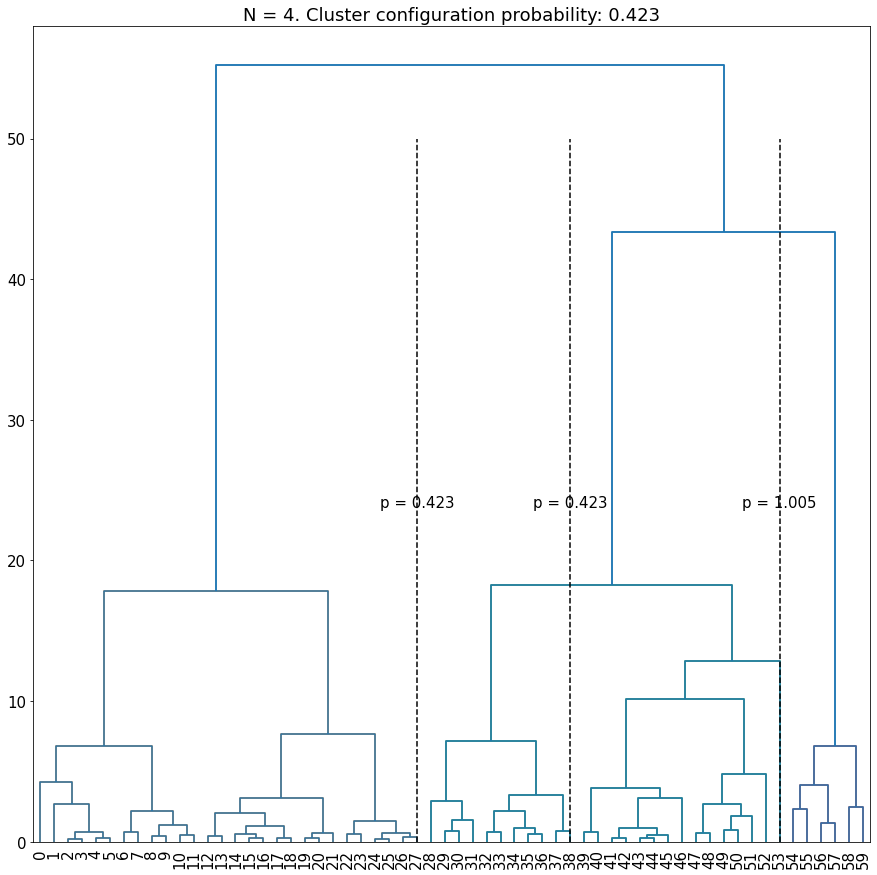

In [899]:
nclust = 4

# cuts_idxs, mask_most_probable_configuration, summary = compile_ensemble(nclust)
# summary

from functools import reduce

summary, Z, dn, final_clusters = show_ensemble_dendrogram(nclust)
summary

In [838]:
np.array(dn['dcoord'])[:, 1]

array([ 0.17208424,  0.28898644,  0.69502533,  2.66680005,  4.23809447,
        0.66745263,  0.39610718,  0.48503092,  1.18082091,  2.1889496 ,
        6.80539138,  0.41692604,  0.29107557,  0.57780852,  0.29810187,
        1.14082734,  2.01769432,  0.30533247,  0.62433935,  3.12777076,
        0.57152006,  0.19704639,  0.32461891,  0.60827317,  1.50489941,
        7.68434023, 17.84515137,  0.75070637,  1.54589645,  2.91008166,
        0.67974003,  0.58940614,  1.01141993,  2.21323734,  0.78094386,
        3.35320706,  7.19595673,  0.7095214 ,  0.27205165,  0.26036203,
        0.4705165 ,  0.99634079,  3.08845787,  3.78971731,  0.61715717,
        0.81421915,  1.83281762,  2.69021633,  4.84936309, 10.1841213 ,
       12.82953107, 18.27569521,  2.34413387,  1.33005841,  4.01478399,
        2.49582245,  6.78566291, 43.3308188 , 55.2097863 ])

In [843]:
tc = cut_tree(Z, n_clusters=nclust).ravel()

In [847]:
tc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])

In [845]:
for i in range(nclust):
    clust_d = np.array(dn['dcoord'])[:, 1][tc == i]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 60

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]])

In [259]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, cut_tree, to_tree

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4]])

In [299]:
node = to_tree(Z)

In [313]:
from cycler import cycler

In [461]:
def _ncluster_to_level(nodelist, ncluster):
    if ncluster <= 0 or len(nodelist) == 0:
        return 0
    remaining = ncluster - len(nodelist)
    new_nodelist = []
    for node in nodelist:
        if node is not None:
            new_nodelist.append(node.left)
            new_nodelist.append(node.right)
    return 1 + _ncluster_to_level(new_nodelist, remaining)

def ncluster_to_level(Z, ncluster):
    node = to_tree(Z)
    return _ncluster_to_level([node], ncluster)


def _depth(node):
    if node is None:
        return 0
    return 1 + max(_depth(node.left), _depth(node.right))

def depth(Z):
    node = to_tree(Z)
    return _depth(node)

def dn_clusters_to_dcoord(dn, ncluster):
    dcoord = dn['dcoord']
    return np.min(np.array(dcoord[-ncluster:])[:, 1])

def dn_clusters_to_icoord(dn, ncluster):
    icoord = np.array(dn['icoord'][-ncluster:])
    bnds = np.unique(icoord[:, 1:3].ravel())
    return bnds[np.argsort(bnds)].reshape(-1, 2)

def dn_take(dn, i):
    res = dict()
    for k, v in dn.items():
        res[k] = v[i]
    return res

def dn_put(dn, node):
    dn = deepcopy(dn)
    if dn is None:
        dn = dict()
        for k, v in node.items():
            dn[k] = [v]
    else:
        for k, v in dn.items():
            dn[k] = dn[k] + [node[k]]
    return dn


def filter_height(dn, thresh):
    """
    Return dendrogram nodes at the height range corresponding to the given number of clusters
    """
#     lim_upper = dn_clusters_to_dcoord(dn, ncluster)
#     lim_lower = dn_clusters_to_dcoord(dn, ncluster + 1)
    #print(lim_lower, lim_upper)
    res = None
    for i, dcs in enumerate(dn['dcoord']):
        dc = dcs[1]
        #print(dc)
        #if lim_lower <= dc < lim_upper:
        if dc >= thresh:
            res = dn_put(res, dn_take(dn, i))
    return res


In [435]:
from copy import deepcopy

In [451]:
res = filter_height(dn, 3)

In [402]:
dn_take(dn, 5)

{'icoord': [115.0, 115.0, 125.0, 125.0],
 'dcoord': [0.0, 0.6171571655944829, 0.6171571655944829, 0.0],
 'ivl': 'foo',
 'leaves': 57,
 'color_list': 'C2'}

In [403]:
dn_take(dn, 5)

{'icoord': [115.0, 115.0, 125.0, 125.0],
 'dcoord': [0.0, 0.6171571655944829, 0.6171571655944829, 0.0],
 'ivl': 'foo',
 'leaves': 57,
 'color_list': 'C2'}

In [404]:
res = dn_put(None, dn_take(dn, 5))

In [409]:
res = dn_put(res, dn_take(dn, 4))
res

{'icoord': [[115.0, 115.0, 125.0, 125.0],
  [5.0, 5.0, 24.375, 24.375],
  [5.0, 5.0, 24.375, 24.375]],
 'dcoord': [[0.0, 0.6171571655944829, 0.6171571655944829, 0.0],
  [0.0, 2.4958224524909824, 2.4958224524909824, 2.451368042600185],
  [0.0, 2.4958224524909824, 2.4958224524909824, 2.451368042600185]],
 'ivl': ['foo', 'foo', 'foo'],
 'leaves': [57, 56, 56],
 'color_list': ['C2', 'C1', 'C1']}

In [672]:
def filter_dn(dn, fn):
    res = dict()
    for k in dn.keys():
        res[k] = []
    for i in range(len(dn[k])):
        if fn(dn_take(dn, i)):
            res = dn_put(res, dn_take(dn, i))
    return res

def sort_dn(dn, fn):
    res = dict()
    nnodes = len(dn['dcoord'])
    idx_sort = np.argsort([fn(node) for node in 
                          map(dn_take, [dn] * nnodes, range(nnodes))])
    for k in dn.keys():
        res[k] = np.array(dn[k], dtype = object)[idx_sort].tolist()
        #res[k] = [list(elt) for elt in res[k]]
        #print(res[k])
    return res

def slice_dn(dn, i):
    res = dict()
    for k, v in dn.items():
        res[k] = v[:i]
    return res



In [546]:
sort_dn(dn, sort_icoord)

{'icoord': [[5.0, 5.0, 24.375, 24.375],
  [15.0, 15.0, 33.75, 33.75],
  [25.0, 25.0, 42.5, 42.5],
  [35.0, 35.0, 50.0, 50.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 94.375, 94.375],
  [14.6875, 14.6875, 156.5869140625, 156.5869140625],
  [85.0, 85.0, 103.75, 103.75],
  [95.0, 95.0, 112.5, 112.5],
  [105.0, 105.0, 120.0, 120.0],
  [115.0, 115.0, 125.0, 125.0],
  [84.6875, 84.6875, 215.2734375, 215.2734375],
  [145.0, 145.0, 155.0, 155.0],
  [65.0, 65.0, 248.173828125, 248.173828125],
  [150.0, 150.0, 174.375, 174.375],
  [135.0, 135.0, 192.34375, 192.34375],
  [165.0, 165.0, 183.75, 183.75],
  [175.0, 175.0, 192.5, 192.5],
  [162.1875, 162.1875, 222.5, 222.5],
  [185.0, 185.0, 200.0, 200.0],
  [195.0, 195.0, 205.0, 205.0],
  [163.671875, 163.671875, 266.875, 266.875],
  [215.0, 215.0, 230.0, 230.0],
  [225.0, 225.0, 235.0, 235.0],
  [149.98046875, 149.98046875, 346.3671875, 346.3671875],
  [245.0, 245.0, 288.75, 288.75],
  [255.0, 255.0, 280.0, 280.0],
  [265.0, 265.0, 275.0, 275.0]

In [675]:
Z = linkage(selected_X)
Z = linkage(X_samples[5])
Z = linkage(X_samples[np.where(mask_most_probable_configuration)[0]].mean(axis = 0), method = 'ward')

# i = 3
# selected_X = X_samples[np.where(mask_most_probable_configuration)[0][i]]
# Z = linkage(selected_X, method='ward')

In [678]:
from scipy.cluster.hierarchy import fcluster

Text(0.5, 1.0, 'Cluster configuration probability: 0.423')

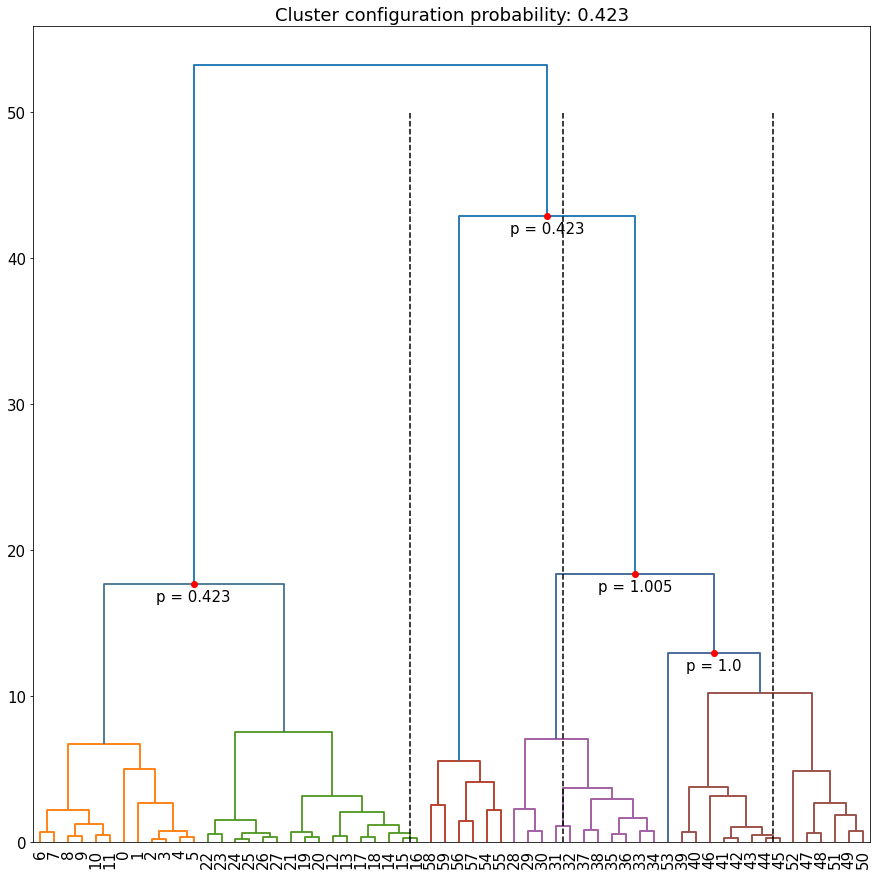

In [705]:
Z = linkage(X_samples[np.where(mask_most_probable_configuration)[0]].mean(axis = 0), method = 'ward')


plt.rc('font', size=15) 
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels

# unconditional cluster probs
cluster_probs = summary.loc[selected_idx].iloc[1]
labels = list(map(lambda num: "p = {}".format(num), cluster_probs))

cut_coords = 10 * np.array(list(iter_combos(cuts_idxs, lambda k, v: k)))[selected_idx][:-1]
annotated_dendrogram(Z, 4, labels)

plt.vlines(cut_coords, 0, 50, colors='k', linestyles='dashed')

plt.title("Cluster configuration probability: {}".format(configuration_freqs[selected_idx]))

In [471]:
dn_take(dn, 5)

{'icoord': [115.0, 115.0, 125.0, 125.0],
 'dcoord': [0.0, 0.6171571655944829, 0.6171571655944829, 0.0],
 'ivl': 'foo',
 'leaves': 57,
 'color_list': 'C2'}

In [112]:
list(iter_combos(cuts_idxs, lambda k, v: v))

[[0.423, 0.577, 1.005, 1.0],
 [0.423, 0.423, 1.005, 1.0],
 [0.308, 0.577, 1.005, 1.0],
 [0.308, 0.423, 1.005, 1.0],
 [0.196, 0.577, 1.005, 1.0],
 [0.196, 0.423, 1.005, 1.0],
 [0.045, 0.577, 1.005, 1.0],
 [0.045, 0.423, 1.005, 1.0],
 [0.026, 0.577, 1.005, 1.0],
 [0.026, 0.423, 1.005, 1.0],
 [0.001, 0.577, 1.005, 1.0],
 [0.001, 0.423, 1.005, 1.0]]

In [117]:
cuts_masks

({27: array([False,  True, False, False,  True, False,  True,  True, False,
          True, False,  True, False, False, False, False,  True, False,
         False,  True, False,  True, False, False,  True, False, False,
         False, False, False,  True,  True,  True,  True,  True, False,
         False,  True,  True,  True, False, False, False, False,  True,
         False, False, False, False,  True, False, False, False,  True,
          True, False, False,  True, False, False,  True, False, False,
         False, False, False,  True,  True, False, False, False, False,
          True, False, False, False,  True,  True,  True, False,  True,
         False,  True,  True, False, False,  True,  True,  True, False,
          True, False, False,  True, False, False,  True,  True,  True,
         False,  True,  True, False,  True,  True, False, False, False,
         False,  True,  True, False, False, False, False, False, False,
         False,  True, False, False,  True,  True,  True, Fa

In [108]:
cuts

[({27: 0.423, 13: 0.308, 11: 0.196, 14: 0.045, 10: 0.026, 12: 0.001},
  {27: array([False,  True, False, False,  True, False,  True,  True, False,
           True, False,  True, False, False, False, False,  True, False,
          False,  True, False,  True, False, False,  True, False, False,
          False, False, False,  True,  True,  True,  True,  True, False,
          False,  True,  True,  True, False, False, False, False,  True,
          False, False, False, False,  True, False, False, False,  True,
           True, False, False,  True, False, False,  True, False, False,
          False, False, False,  True,  True, False, False, False, False,
           True, False, False, False,  True,  True,  True, False,  True,
          False,  True,  True, False, False,  True,  True,  True, False,
           True, False, False,  True, False, False,  True,  True,  True,
          False,  True,  True, False,  True,  True, False, False, False,
          False,  True,  True, False, False, False

In [994]:
# should sum to number of runs
sum([reduce(lambda a, b: a & b, itmask).sum() for itmask in itmasks])

2000

In [651]:
%pdb

Automatic pdb calling has been turned OFF


In [620]:
x, y = list(map(lambda x: np.hstack(x), list(zip(*[boundary_freq(i) for i in range(nclust)]))))
#x, y = np.hstack((x, y)), np.hstack((y, x))

In [621]:
vc = pd.DataFrame([x, y]).T.value_counts()

In [622]:
x, y = np.array(list(vc.index)).T
z = vc.values

In [623]:
y.mean(), x.mean()

(17.2, 31.2)

In [624]:
x.shape

(20,)

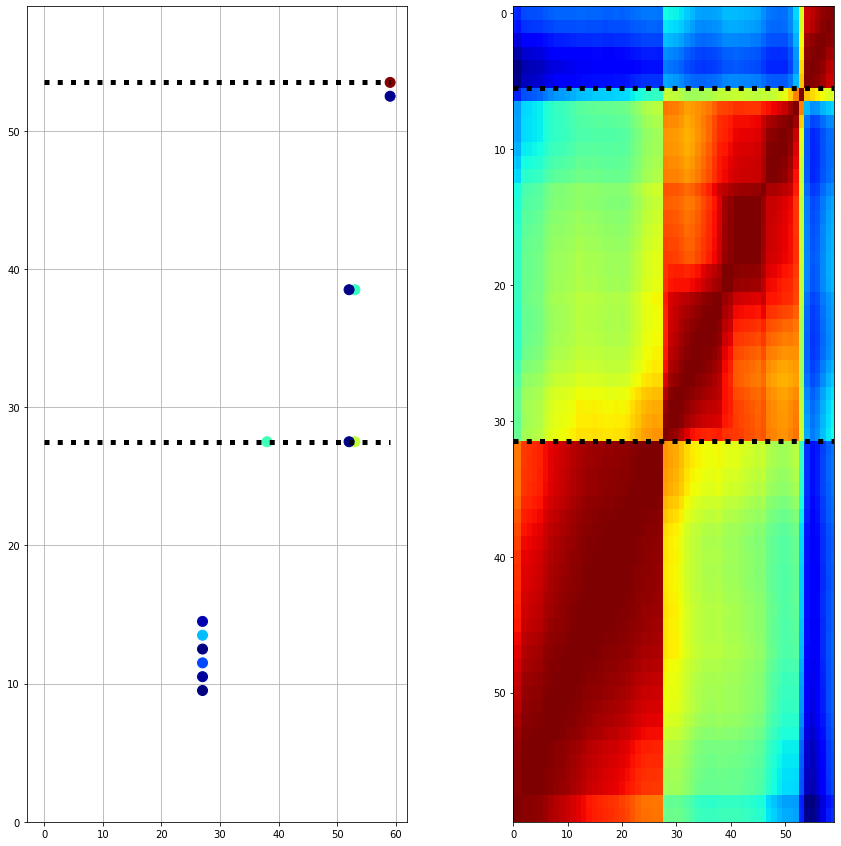

In [625]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
a, b = 1, 2
plt.subplot(a, b, 1)
plt.scatter(x, y - .5, c = z / 2000, cmap = 'jet', s = 100)
plt.grid()
plt.ylim(0, 59)
plt.hlines(60 - 6.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(27.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
#plt.colorbar()

plt.subplot(a, b, 2)
plt.imshow(feat.csim_pairs(act.T)[::-1, :], cmap = 'jet', aspect = 2.5)
plt.xlim(0, 59)
plt.hlines(5.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(60 - 28.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')


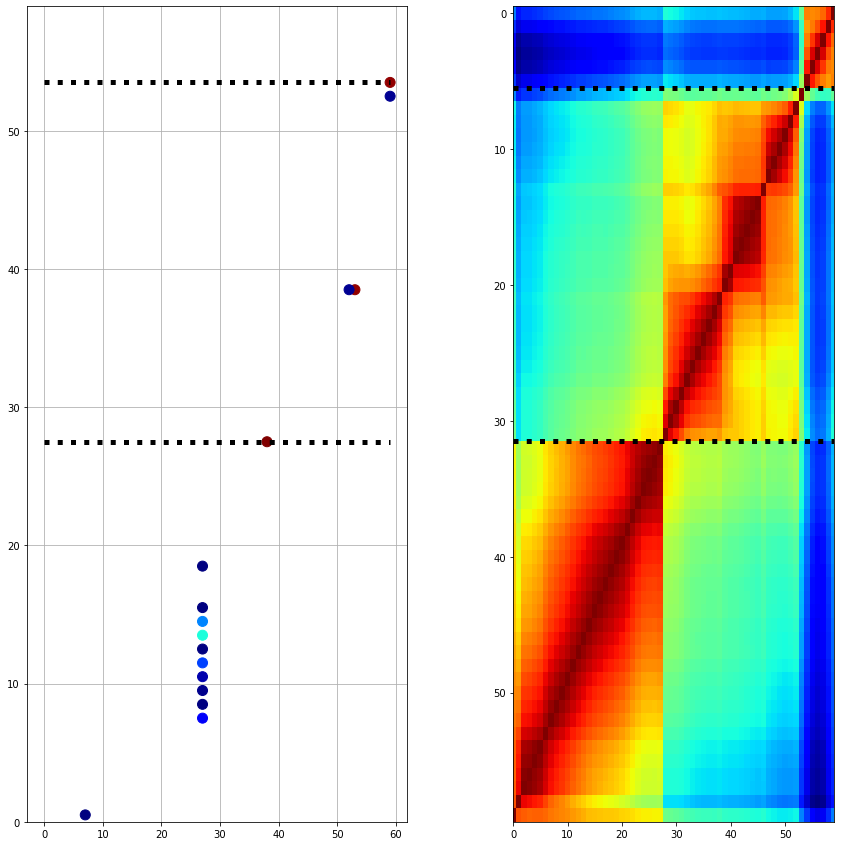

In [605]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
a, b = 1, 2
plt.subplot(a, b, 1)
plt.scatter(x, y - .5, c = z / 2000, cmap = 'jet', s = 100)
plt.grid()
plt.ylim(0, 59)
plt.hlines(60 - 6.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(27.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')

#plt.colorbar()

plt.subplot(a, b, 2)
plt.imshow(feat.l2_sim(act.T)[::-1, :], cmap = 'jet', aspect = 2.5)
plt.xlim(0, 59)
plt.hlines(5.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(60 - 28.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')


In [459]:
x, y = np.hstack((x, y)), np.hstack((y, x))

In [460]:
y = y - x

In [462]:
#y[y < 0] = np.nan

In [445]:
x

array([53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 53, 53, 52, 27, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 27,
       53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 27, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 27, 53, 53, 27,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 27, 53, 53, 13, 27,
       13, 14, 53, 27, 13, 13, 27, 14, 14, 13, 59, 53, 13, 14, 27, 27, 13,
       27, 27, 14, 13, 14, 14, 13, 27, 53, 13, 27, 27, 27, 13, 53, 13, 14,
       27, 27, 14, 27, 14, 53, 13, 27, 14, 13, 14, 53, 27, 27, 13, 14, 14,
       13, 13, 27, 13, 14, 13, 27, 27, 13, 14, 27, 53, 27, 27, 53, 27, 27,
       27, 13, 13, 13, 14, 13, 27, 27, 13, 53, 13, 27, 27, 27, 27, 27, 13,
       13, 13, 13, 13, 27, 53, 27, 14, 13, 13, 53, 27, 14, 27, 38, 27, 27,
       38, 11, 27, 27, 11, 27, 27, 27, 13, 38, 27, 27, 11, 38, 27, 38, 11,
       27, 27, 27, 27, 27

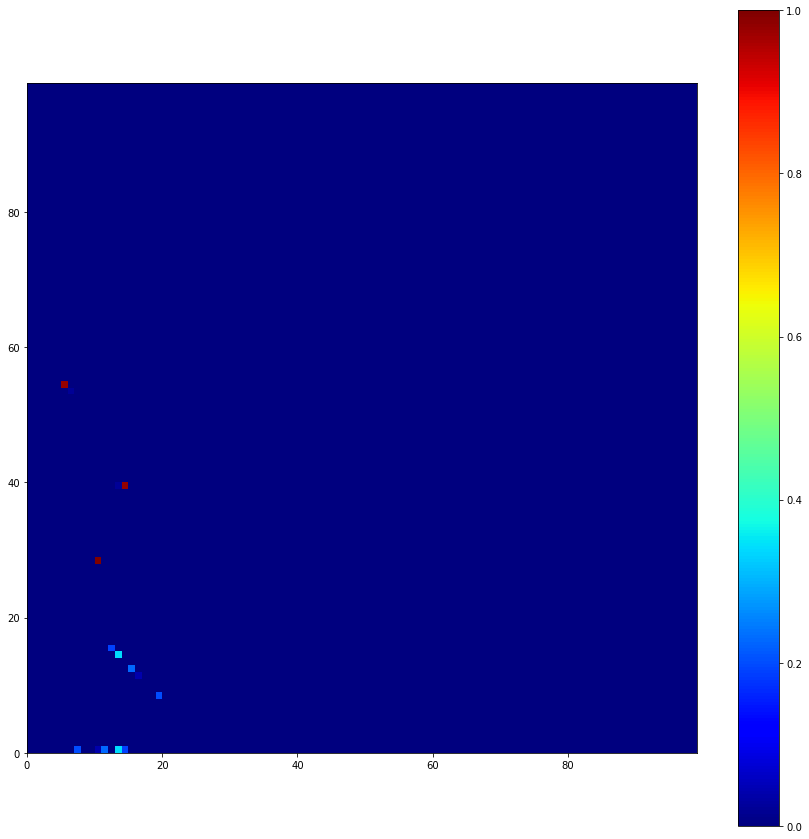

In [463]:
H, xe, ye = np.histogram2d(x, y, bins = [np.arange(N), np.arange(N)])

plt.rcParams["figure.figsize"]=(15, 15)
# TODO handle missing data
img = H / N
#img = np.log(1 + H)
plt.imshow(img, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], cmap = 'jet')
plt.colorbar()

In [ ]:
np.histogram2d()

In [369]:
for i in range(nclust):
    print_cluster_stats(i)

cluster: {39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}
with probability: 87.0 percent
cluster: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
with probability: 33.0 percent
cluster: {14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
with probability: 33.0 percent
cluster: {32, 33, 34, 35, 36, 37, 38, 28, 29, 30, 31}
with probability: 70.0 percent
cluster: {54, 55, 56, 57, 58, 59}
with probability: 88.0 percent


In [256]:
draw_counts = pd.DataFrame(idx_draws).value_counts().sort_values()

In [258]:
imerge, jmerge = draw_counts.sort_values().index[-1][0]

In [259]:
draw_probs = draw_counts / draw_counts.sum()

In [223]:
new_prob = draw_probs[(imerge, jmerge)].iloc[0] * np.prod(c_probs[[imerge, jmerge]])

In [263]:
# TODO
# pd.DataFrame(draw_probs.iloc[:-1], columns = ['prob']).reset_index()
other_probs = c_probs[idx_other]

c_probs_tmp = np.hstack((new_prob, other_probs))

In [270]:
c_probs_tmp

array([0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  ])

In [203]:
#     imerge, jmerge = np.unravel_index(np.argmin(distances, axis=None), distances.shape)

#     newcluster = np.vstack((clusters[imerge], clusters[jmerge]))
    
#     newcluster_ids = np.concatenate(ids[[imerge, jmerge]])[None, :]

#     idx_other = np.array(list(set(list(range(len(clusters)))) - set([imerge, jmerge])))

#     otherclusters = [clusters[idx] for idx in idx_other]

#     otherclusters_ids = ids[idx_other]

#     new_size = c_sizes[[imerge, jmerge]].sum()
#     others_sizes = c_sizes[idx_other]

#     # calculate new pairwise distance matrix
#     #new_distances_ij = np.array([get_new_distance(new_size, imerge, jmerge, , c_sizes) for k in idx_other])
#     new_distances_ij = get_new_distance(new_size, imerge, jmerge, idx_other, c_sizes, distances)
#     distances_tmp = distances[np.ix_(idx_other.ravel(), idx_other.ravel())]
#     distances_tmp = np.hstack((
#           np.vstack(([np.inf], new_distances_ij[:, None])),
#           np.vstack((new_distances_ij, distances_tmp))))

#     clusters_tmp = np.array([newcluster] + otherclusters, dtype = object)

#     ids_tmp = np.array(list(newcluster_ids) + list(otherclusters_ids), dtype = object)

#     c_sizes_tmp = np.hstack((new_size, c_sizes[idx_other]))

In [163]:
# distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp, merge_idxs = agglom_step(distances, ids, clusters, c_sizes)

In [14]:
for _ in range(55):
    distances, ids, clusters, c_sizes = agglom_step(distances, ids, clusters, c_sizes)

In [212]:
%pdb

Automatic pdb calling has been turned ON


In [80]:
def do(distances, ids, clusters, c_sizes):
    for _ in range(55):
        distances, ids, clusters, c_sizes = agglom_step(distances, ids, clusters, c_sizes)
    return distances, ids, clusters, c_sizes

In [145]:
%timeit -n 1 -r 1 do(distances, ids, clusters, c_sizes)

5.48 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
%timeit -n 1 -r 1 clustering = AgglomerativeClustering(n_clusters=5).fit(X)

411 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


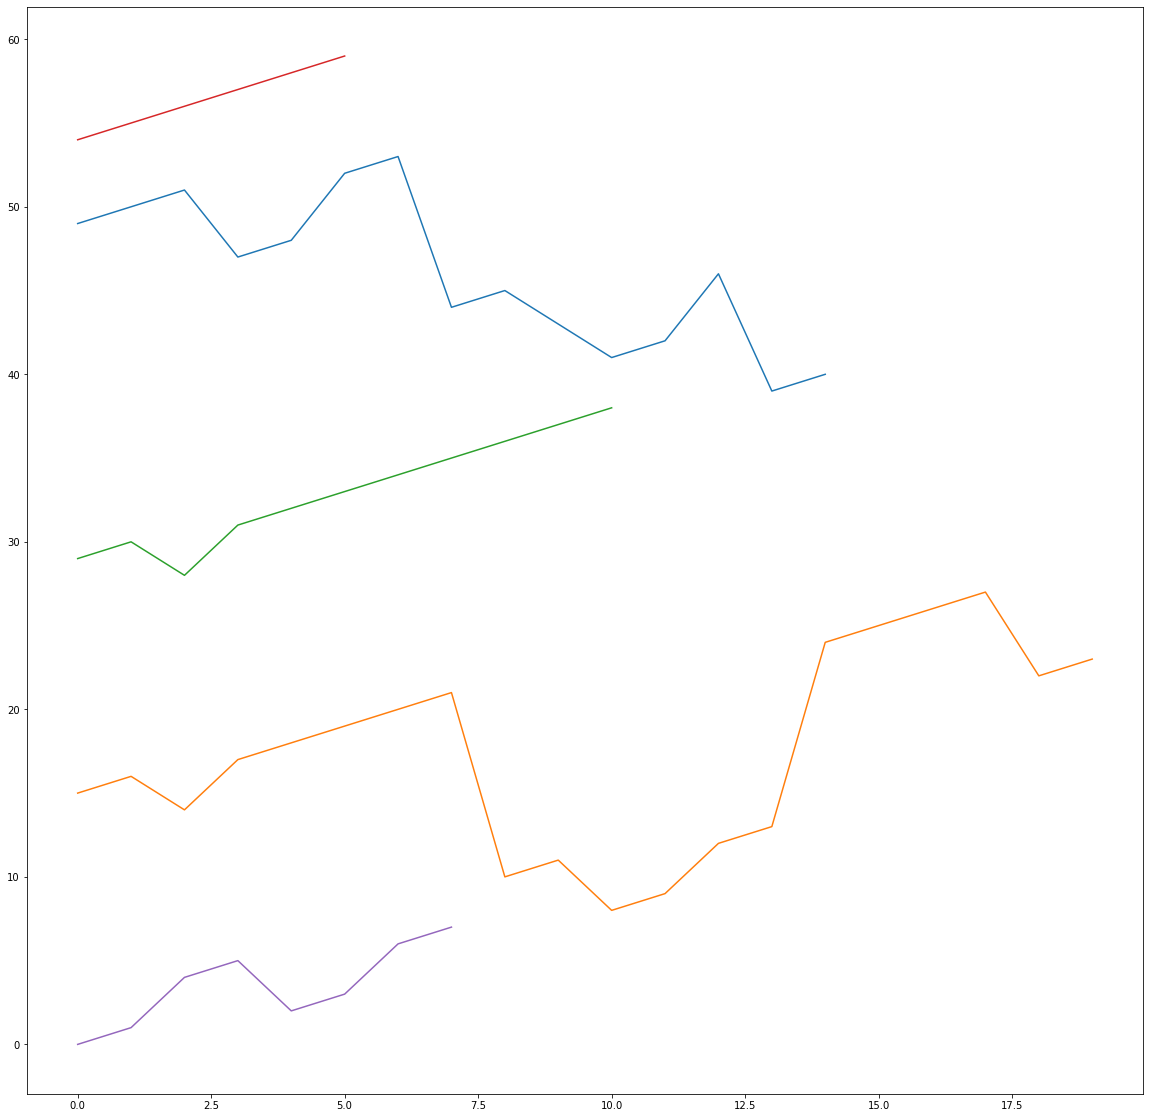

In [15]:
for row in ids:
    plt.plot(row)

In [35]:
ids, c_sizes

(array([array([49, 50, 51, 47, 48, 52, 53, 44, 45, 43, 41, 42, 46, 39, 40]),
        array([15, 16, 14, 17, 18, 19, 20, 21, 10, 11,  8,  9, 12, 13, 24, 25, 26,
               27, 22, 23])                                                       ,
        array([29, 30, 28, 31, 32, 33, 34, 35, 36, 37, 38]),
        array([54, 55, 56, 57, 58, 59]), array([0, 1, 4, 5, 2, 3, 6, 7])],
       dtype=object),
 array([15, 20, 11,  6,  8]))

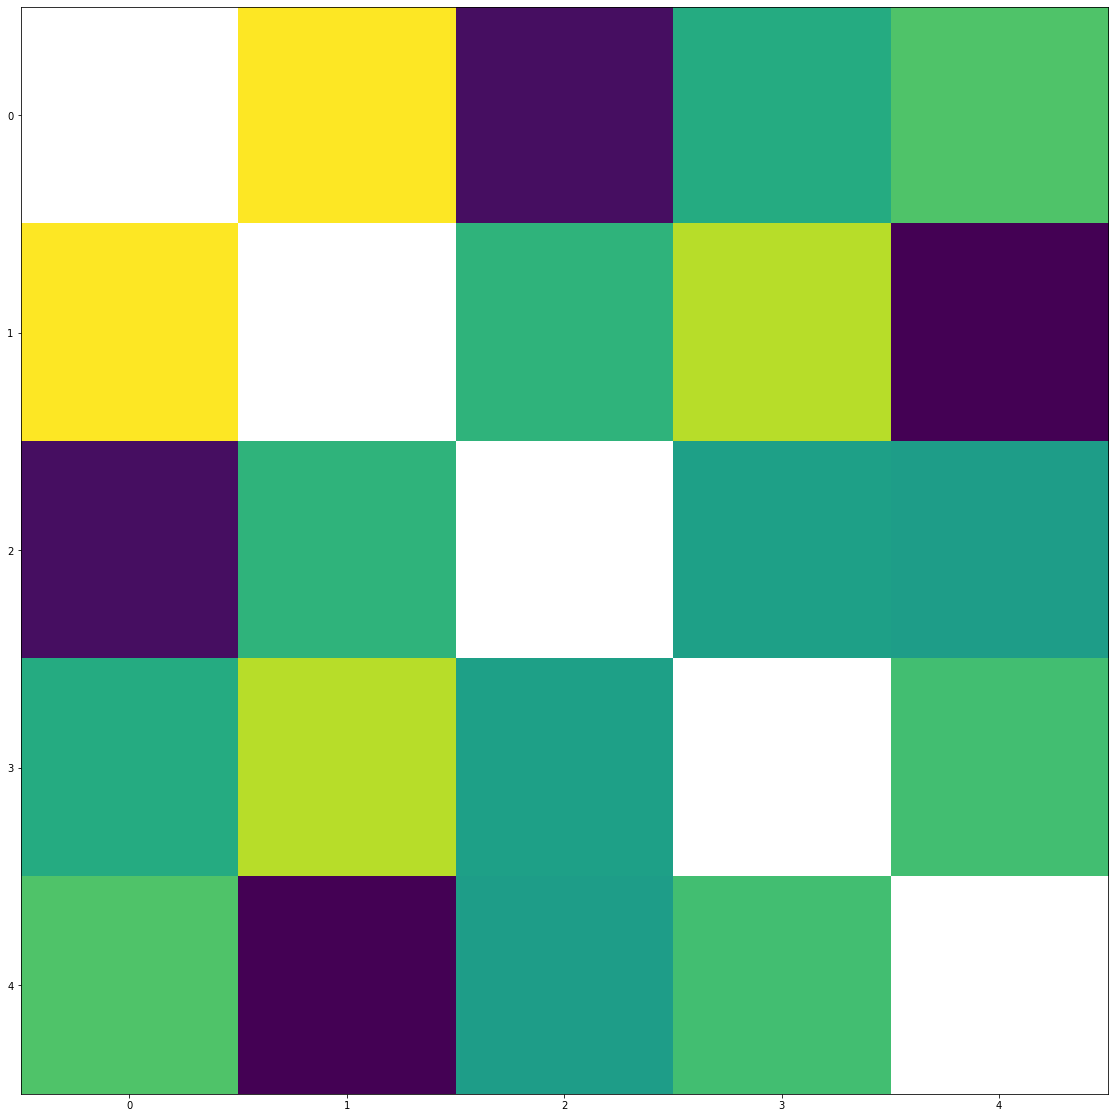

In [37]:
plt.imshow(distances)

In [38]:
#https://stackoverflow.com/questions/22927181/selecting-specific-rows-and-columns-from-numpy-array
#np.ix_(otherclusters_ids.ravel(), otherclusters_ids.ravel())